In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #for making figures
%matplotlib inline

In [3]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [11]:
#build the vocabulary of characters and mappings to/from integers
#note stoi and itos are dictionaries
chars = sorted(list(set(''.join(words))))#characters
stoi = {s:i+1 for i,s in enumerate(chars)}#string to integers
stoi['.'] =0 #adding "." to our characters which is a to z 
itos = {i:s for s,i in stoi.items()} #just keeping integers at front and characters at second
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [14]:
chars = sorted(list(set(''.join(words))))#characters

for i,s in enumerate(chars):
    print(s,i+1)

a 1
b 2
c 3
d 4
e 5
f 6
g 7
h 8
i 9
j 10
k 11
l 12
m 13
n 14
o 15
p 16
q 17
r 18
s 19
t 20
u 21
v 22
w 23
x 24
y 25
z 26


In [14]:

#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))#characters
stoi = {s:i+1 for i,s in enumerate(chars)}#string to integers
stoi.items() #gives list of tuples

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26)])

In [16]:
chars = sorted(list(set(''.join(words))))#characters
stoi = {s:i+1 for i,s in enumerate(chars)}#string to integers
for s,i in stoi.items():
    print(i,s)

1 a
2 b
3 c
4 d
5 e
6 f
7 g
8 h
9 i
10 j
11 k
12 l
13 m
14 n
15 o
16 p
17 q
18 r
19 s
20 t
21 u
22 v
23 w
24 x
25 y
26 z


In [12]:
#build the dataset
block_size = 3 #context length : how many characters we take to predict the next one
X,Y = [] , [] #X is inputs and Y is labels to the inputs
for w in words[:5]: 
    print(w)
    context = [0]*block_size
    context
    for ch in w + '.': #including '.' with  all the characters in 5 names 
        ix = stoi[ch] #gets the character in sequence meaning-
        #ix gives the number value of a,b,c,d,etc for eg for a is 1, b is 2
        X.append(context) #stores the current running sequence
        Y.append(ix) #stores the sequence of alphabets
        print(''.join(itos[i] for i in context), '---->',itos[ix])
        context = context[1:] + [ix] #crop and append: crop the context and enter the sequence
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [33]:
X #same as above but in tensor form

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [34]:
X.shape, X.dtype

(torch.Size([32, 3]), torch.int64)

In [35]:
Y #same as above but in tensor form
#he says Y are the labels becoz  Y is 1 for a, 2 for b , and so on


tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [36]:
Y.shape, Y.dtype

(torch.Size([32]), torch.int64)

In [37]:
#now lets write neural network that takes X and predicts Y
#We have 27 possible characters and we are going to embedd them into lower dimension space (eg 2)




In [38]:
#here each one of  27 alphabetical characters will have 2 dimensional embeddings(columns)
C = torch.randn(27,2)


In [64]:
C


tensor([[ 1.0711, -0.8820],
        [-0.7556, -0.2081],
        [-2.0182, -1.0529],
        [ 0.3585,  2.2162],
        [ 0.6602, -0.3689],
        [-0.2494, -0.5952],
        [ 1.9089,  0.1458],
        [-1.1049,  0.6283],
        [-0.6471, -0.2741],
        [-0.7328, -1.4011],
        [-1.3276,  0.5178],
        [-0.9175,  0.4276],
        [ 0.2672, -0.7977],
        [-0.9011,  0.9246],
        [-0.0124, -0.8901],
        [ 0.5618, -0.0989],
        [-0.4265, -0.1173],
        [-0.6315,  2.0224],
        [-1.0791, -0.4604],
        [ 0.2689,  2.0248],
        [-0.0243,  1.1189],
        [ 0.2205,  1.0552],
        [ 1.1129,  0.0395],
        [ 1.2117,  0.6793],
        [ 0.7426,  0.0851],
        [ 0.3389,  2.6479],
        [ 0.0912,  0.8089]])

In [41]:
#before we embed all of the integers inside the input X using the lookup take C, we will try to embed -
#a single individual integer 5
C[5]

tensor([-0.7396, -0.2515])

In [44]:
F.one_hot(torch.tensor(5), num_classes = 27)
#revision: one hot vector gives the position of the selected element in the selected num_classes.
#index of 5 in  a zero vectors of size 27. 
#here 27 is our size of a to z + '.'

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [45]:
#now if we take the one hot vector and mulitply with c 
F.one_hot(5, num_classes = 27) #throws error 
#bcoz the parameters of one_hot vector should be in tensor not integer


TypeError: one_hot(): argument 'input' (position 1) must be Tensor, not int

In [46]:
#now if we take the one hot vector and mulitply with c 
F.one_hot(torch.tensor(5), num_classes = 27) @ C
#also error because C is a float and one_hot vector is int

RuntimeError: expected m1 and m2 to have the same dtype, but got: long long != float

In [50]:
#now if we take the one hot vector and mulitply with c 
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C


tensor([-0.7396, -0.2515])

In [52]:
#now look at the position of 5 in result of line 39 from randn function of C.
#above resultant  and this resultant for 5 are same
#they are same bcoz of how matrix multiplication works
C[5]

tensor([-0.7396, -0.2515])

In [54]:
#but we are going to discard one_hot and use index to create and use embedding tables bcoz its much fast4er
#embedding a single integer is fine but the issue arrises 
#how to we simultaneously embed 32*3integers (shape of X tensor) in array X
#luckily pytorch indexing is fairly flexible and powerful, we can also index using lists and tensor also
#we can also repeat same index
C[X]

tensor([[[-0.7423, -0.9527],
         [-0.7423, -0.9527],
         [-0.7423, -0.9527]],

        [[-0.7423, -0.9527],
         [-0.7423, -0.9527],
         [-0.7396, -0.2515]],

        [[-0.7423, -0.9527],
         [-0.7396, -0.2515],
         [ 0.0371, -0.5359]],

        [[-0.7396, -0.2515],
         [ 0.0371, -0.5359],
         [ 0.0371, -0.5359]],

        [[ 0.0371, -0.5359],
         [ 0.0371, -0.5359],
         [ 0.0781,  1.0029]],

        [[-0.7423, -0.9527],
         [-0.7423, -0.9527],
         [-0.7423, -0.9527]],

        [[-0.7423, -0.9527],
         [-0.7423, -0.9527],
         [-0.5786, -1.1284]],

        [[-0.7423, -0.9527],
         [-0.5786, -1.1284],
         [-0.4093,  0.8374]],

        [[-0.5786, -1.1284],
         [-0.4093,  0.8374],
         [-1.4390,  0.1743]],

        [[-0.4093,  0.8374],
         [-1.4390,  0.1743],
         [-0.8207,  0.5067]],

        [[-1.4390,  0.1743],
         [-0.8207,  0.5067],
         [-1.4390,  0.1743]],

        [[-0.8207,  0

In [68]:
X.shape

torch.Size([32, 3])

In [67]:
C =torch.randn(27,2)
C

tensor([[ 1.2173,  0.0507],
        [-0.2756, -0.0916],
        [-0.0777, -0.2588],
        [ 0.7871,  0.4506],
        [ 1.0318, -0.7871],
        [-0.2263, -0.4044],
        [-0.5612,  0.1794],
        [-0.0040, -0.4620],
        [ 1.3280,  0.5744],
        [-0.4519,  1.2258],
        [-0.8532,  1.0679],
        [-1.4275, -1.2740],
        [ 0.8664,  0.8310],
        [-0.0469,  0.0607],
        [-0.4976,  0.2890],
        [ 1.4423, -0.0607],
        [-1.8962,  1.1836],
        [-2.0133, -1.2333],
        [-0.8790,  0.7800],
        [ 0.5196, -0.1504],
        [-1.8798, -0.3277],
        [-0.5186,  0.8508],
        [ 0.4364, -1.2417],
        [ 0.5866, -0.0350],
        [ 0.0646,  1.3123],
        [-1.3500,  0.5595],
        [ 2.5893, -0.2545]])

In [60]:
C[X].shape

torch.Size([32, 3, 2])

In [61]:
#for example
X[13,2]

tensor(1)

In [65]:
C[X][13,2]

tensor([-0.7556, -0.2081])

In [66]:
C[1]

tensor([-0.7556, -0.2081])

In [69]:
#---------------------------------------


In [90]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [70]:
#constructing the hidden layer
W1 = torch.randn((6,100)) #6 bcoz we have 2 dimensional embeddings and we have 3 neural weights
b1 = torch.randn(100) #biases


In [100]:
W1.shape

torch.Size([6, 100])

In [72]:
#We want to multiply the embedings with the weights and add the bias but  the embeddings are stacked on the 
#dimension of this input tensor and it wont work
emb @ W1 +b1
#matrix1 and matrix2 shapes cannot be multiplied (96x2 and 6x100)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [73]:
#how do we tansfor 32*3 into 32*6
emb[:,0,:].shape

torch.Size([32, 2])

In [74]:
#we use concatenate
#Concatenates the given sequence of seq tensors in the given dimension. All tensors must have the same shape
#(except in the concatenating dimension) or be empty.
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)

tensor([[ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2263, -0.4044],
        [ 1.2173,  0.0507, -0.2263, -0.4044, -0.0469,  0.0607],
        [-0.2263, -0.4044, -0.0469,  0.0607, -0.0469,  0.0607],
        [-0.0469,  0.0607, -0.0469,  0.0607, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.4423, -0.0607],
        [ 1.2173,  0.0507,  1.4423, -0.0607,  0.8664,  0.8310],
        [ 1.4423, -0.0607,  0.8664,  0.8310, -0.4519,  1.2258],
        [ 0.8664,  0.8310, -0.4519,  1.2258,  0.4364, -1.2417],
        [-0.4519,  1.2258,  0.4364, -1.2417, -0.4519,  1.2258],
        [ 0.4364, -1.2417, -0.4519,  1.2258, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2756, -0.0916],
        [ 1.2173,  0.0507, -0.2756, -0.0916,  0.4364, -1.2417],
        [-0.2756, -0.0916,  0.4364, -1.2

In [76]:
#unbind: removes a tensor dimension & returns a tuple of all slices along a given dimension, already without it
torch.cat(torch.unbind(emb,1),1)
#both the result of 75 and 76 are same
#concatenation  creates a whole new tensor which is a wastage of storage.

tensor([[ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2263, -0.4044],
        [ 1.2173,  0.0507, -0.2263, -0.4044, -0.0469,  0.0607],
        [-0.2263, -0.4044, -0.0469,  0.0607, -0.0469,  0.0607],
        [-0.0469,  0.0607, -0.0469,  0.0607, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.4423, -0.0607],
        [ 1.2173,  0.0507,  1.4423, -0.0607,  0.8664,  0.8310],
        [ 1.4423, -0.0607,  0.8664,  0.8310, -0.4519,  1.2258],
        [ 0.8664,  0.8310, -0.4519,  1.2258,  0.4364, -1.2417],
        [-0.4519,  1.2258,  0.4364, -1.2417, -0.4519,  1.2258],
        [ 0.4364, -1.2417, -0.4519,  1.2258, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2756, -0.0916],
        [ 1.2173,  0.0507, -0.2756, -0.0916,  0.4364, -1.2417],
        [-0.2756, -0.0916,  0.4364, -1.2

In [80]:
a = torch.arange(18)
a


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [81]:
a.shape

torch.Size([18])

In [83]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [84]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [85]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [89]:
#note: view function can be used to rearrange the matrix element in any size in the way we want
#very important

In [87]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [91]:
emb.view(32,6)
#we needed in 32*6 order which was given by view function which we can verify in following steps

tensor([[ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2263, -0.4044],
        [ 1.2173,  0.0507, -0.2263, -0.4044, -0.0469,  0.0607],
        [-0.2263, -0.4044, -0.0469,  0.0607, -0.0469,  0.0607],
        [-0.0469,  0.0607, -0.0469,  0.0607, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.4423, -0.0607],
        [ 1.2173,  0.0507,  1.4423, -0.0607,  0.8664,  0.8310],
        [ 1.4423, -0.0607,  0.8664,  0.8310, -0.4519,  1.2258],
        [ 0.8664,  0.8310, -0.4519,  1.2258,  0.4364, -1.2417],
        [-0.4519,  1.2258,  0.4364, -1.2417, -0.4519,  1.2258],
        [ 0.4364, -1.2417, -0.4519,  1.2258, -0.2756, -0.0916],
        [ 1.2173,  0.0507,  1.2173,  0.0507,  1.2173,  0.0507],
        [ 1.2173,  0.0507,  1.2173,  0.0507, -0.2756, -0.0916],
        [ 1.2173,  0.0507, -0.2756, -0.0916,  0.4364, -1.2417],
        [-0.2756, -0.0916,  0.4364, -1.2

In [93]:
#true means all the elements are equal in the matrix
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [101]:
# now the error in line 76 can be managed with view by
#h= emb.view(32,6) @ W1 +b1
#alternatively we can write above code like below
#h =emb.view(shape[0],6)@ W1 +b1 or,
h =emb.view(-1,6)@ W1 +b1  #here pytorch will infer what "-1" should be. bcoz number of elements must be the -
#same and we have entered 6 (columns) already. pytorch will derive "-1" (rows) to be 32

In [102]:
h

tensor([[-2.0095,  0.0900,  0.0771,  ..., -2.5085, -0.2951, -2.1940],
        [-3.7089, -1.7027, -3.3995,  ...,  1.1338, -2.2981, -1.5713],
        [-0.8601, -1.8549,  0.4749,  ...,  0.3254, -2.5204, -0.8408],
        ...,
        [ 4.3472, -0.1849,  5.7617,  ..., -4.6733, -0.8237, -1.5349],
        [-5.9016, -0.2602,  0.5564,  ...,  1.9949,  5.5041,  0.6974],
        [-0.4406, -2.0404, -1.4901,  ...,  0.5199, -2.4948, -1.1118]])

In [99]:
h.shape 
#remember we multiplied matrix of size 32*6(modified emb) @ 6*100 (W1)

torch.Size([32, 100])

In [104]:
#now for hidden layer activation use tanh. See graph
h = torch.tanh(emb.view(-1,6)@ W1 +b1)

In [106]:
h.shape

torch.Size([32, 100])

In [107]:
#we want to be sure of the broadcasting does what we would like
b1.shape

torch.Size([100])

In [108]:
#32*100 broadcasting to 100
#broadcasting will allign on the right , create a fake dimension which becomes 1,100 row vector
#32,  100
#1,   100

#meaning it will copy vertically for every one of these of rows 32 and do an element wise addition
#in this case the correct broadcasting will be happening becasue  the same bias vector will be added 
#to all the rows of the "h" matrix

In [109]:
#creating final layer
W2 = torch.randn(100,27) # 100 bcoz b1 shape is 100 and 27 bcoz the output characters will be total of 27
b2 = torch.randn(27)

In [110]:
logits = h @ W2 +b2

In [111]:
logits.shape

torch.Size([32, 27])

In [112]:
counts = logits.exp()

In [113]:
prob = counts/counts.sum(1, keepdims = True)

In [114]:
prob.shape

torch.Size([32, 27])

In [115]:
prob[0].sum() #sum 1 means it is normalized

tensor(1.0000)

In [ ]:
#We would like to now index into the rows of probs and in each row we like to pluck out the
#probabilities assigned to the correct character as given below by 'Y' 

In [121]:
prob[torch.arange(32),Y] #this gives the current probabilities as assigned by this neural network with this 
#setting of weights to the correct character in the sequence

tensor([1.8396e-11, 1.2810e-12, 1.8373e-12, 1.2422e-04, 6.5573e-06, 2.8568e-04,
        4.7848e-04, 7.0228e-13, 2.1446e-05, 5.0172e-06, 2.2705e-09, 7.4921e-04,
        1.1582e-05, 1.7964e-07, 4.5950e-10, 1.8584e-06, 2.0510e-07, 1.2420e-11,
        5.5001e-02, 1.1046e-14, 3.3578e-10, 1.2421e-09, 1.9903e-04, 3.6046e-04,
        6.8959e-12, 1.4681e-06, 7.4422e-06, 4.0519e-09, 1.6377e-04, 1.9379e-01,
        2.3080e-03, 1.2495e-11])

In [119]:
torch.arange(32) # is an iterator from 1 to 32

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [116]:
#Now we  have the actual letter that comes next, which comes from the arrays Y
Y

#Y are the  elements  after -------> in the result of line 32

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [122]:
#loss is logged and meaned version of line 121 which is the current probabilities assigned by neural network
loss = -prob[torch.arange(32),Y].log().mean()

loss

tensor(15.6753)

In [123]:
#-------------------------------------made more respectable-----------------------------------------------------------------

In [125]:
X.shape, Y.shape #our dataset

(torch.Size([32, 3]), torch.Size([32]))

In [6]:
g = torch.Generator().manual_seed(2147483647) #for reproducibility
C = torch.randn((27,2), generator =g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator =g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [128]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [139]:
for p in parameters:
    p.requires_grad = True

In [143]:
for _ in range(1000):
    #forward pass
    emb = C[X] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1 +b1) #32, 100
    logits = h@W2 +b2 #(32, 27)
    #counts = logits.exp()
    #prob = counts/ counts.sum(1,keepdims = True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    #loss
    loss = F.cross_entropy(logits,Y) #returns the same resut as our loss function above but, 
    # Efficient to use entropy and it is numerically well behaved
    #print(loss.item())

    #backwward pass
    for p in parameters:
        p.grad = None # same as setting it to 0 in pytorch
    loss.backward() #to populate these gradients
    #once we have the gradients we can do the parameters update
    #update
    for p in parameters:
        p.data += -0.1*p.grad
print(loss.item())


0.25349006056785583


In [132]:
F.cross_entropy(logits,Y)
#returns the same resut as our loss function, Efficient to use entropy and it is numerically well behaved

tensor(17.7697)

In [145]:
logits.max(1)

torch.return_types.max(
values=tensor([13.9257, 19.0060, 21.1507, 21.4255, 17.5853, 13.9257, 16.8309, 14.8607,
        16.6102, 19.3434, 16.8704, 21.8065, 13.9257, 18.1495, 18.0791, 21.0530,
        13.9257, 17.4576, 16.2182, 18.0743, 19.3343, 16.9431, 11.7467, 11.4520,
        16.1146, 13.9257, 16.9535, 17.7748, 13.3471, 16.8707, 20.0948, 17.2168],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [146]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [147]:
#We can not lower the loss function to 0 bcoz when we see the example above ln32 , 
#... ----> e 
#... ----> o
#... ----> s
#neural network was supposed to predict e for emma , o for Olivia , and s for sophia from same "...".

In [30]:
#build the dataset
block_size = 3 #context length : how many characters we take to predict the next one
X,Y = [] , [] #X is inputs and Y is labels to the inputs
for w in words: 
    #print(w)
    context = [0]*block_size
    context
    for ch in w + '.': #including '.' with  all the characters in 5 names 
        ix = stoi[ch] #gets the character in sequence meaning-
        #ix gives the number value of a,b,c,d,etc for eg for a is 1, b is 2
        X.append(context) #stores the current running sequence
        Y.append(ix) #stores the sequence of alphabets
        #print(''.join(itos[i] for i in context), '---->',itos[ix])
        context = context[1:] + [ix] #crop and append: crop the context and enter the sequence
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [31]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [32]:
g = torch.Generator().manual_seed(2147483647) #for reproducibility
C = torch.randn((27,2), generator =g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator =g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [33]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [34]:
for p in parameters:
    p.requires_grad = True

In [22]:
for _ in range(100):
    
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) #limiting our examples from 228146 to 32
    
    #forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1 +b1) #32, 100
    logits = h@W2 +b2 #(32, 27)
    #counts = logits.exp()
    #prob = counts/ counts.sum(1,keepdims = True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    #loss
    loss = F.cross_entropy(logits,Y[ix]) #returns the same resut as our loss function above but, 
    # Efficient to use entropy and it is numerically well behaved
    #print(loss.item())


    #backwward pass
    for p in parameters:
        p.grad = None # same as setting it to 0 in pytorch
    loss.backward() #to populate these gradients
    #once we have the gradients we can do the parameters update
    #update
    for p in parameters:
        p.data += -0.1*p.grad # 0.1 here is learning rate, a random number. How do we determine this number?
print(loss.item())

4.441070079803467


In [23]:
torch.randint(0,X.shape[0],(32,))

tensor([102797, 112978, 207022, 174947,  95168, 148488, 149329, 115164, 138556,
         34067, 102851, 202207,   8746,   8343,  15692, 216462,  23938,  37191,
        126199, 193343, 164156,  25035,  79735,  41200,  38568, 168822,  20590,
          3716, 138716,  89247, 153887,  20649])

In [24]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1 +b1) #32, 100
logits = h@W2 +b2 #(32, 27)
loss = F.cross_entropy(logits,Y)
loss

tensor(3.9027, grad_fn=<NllLossBackward0>)

In [25]:
#learning rate

#torch.linspace(0.001,1,1000) #this creates 1000 number in between from 0.001 to 1

lre = torch.linspace(-3,0,1000) #learning rate exponent
lrs =10**lre 

lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [41]:
lri=[]
lossi = []

for i in range(1000):
    
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) #limiting our examples from 228146 to 32
    
    #forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1 +b1) #32, 100
    logits = h@W2 +b2 #(32, 27)
    #counts = logits.exp()
    #prob = counts/ counts.sum(1,keepdims = True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    #loss
    loss = F.cross_entropy(logits,Y[ix]) #returns the same resut as our loss function above but, 
    # Efficient to use entropy and it is numerically well behaved
    print(loss.item())


    #backwward pass
    for p in parameters:
        p.grad = None # same as setting it to 0 in pytorch
    loss.backward() #to populate these gradients
    #once we have the gradients we can do the parameters update
    #update
    for p in parameters:
        lr = lrs[i]
        p.data += -lr*p.grad # 0.1 here is learning rate, a random number. How do we determine this number?
    #track Stats
    lri.append(lre[i])
    lossi.append((loss.item()))
        
#print(loss.item())



4.618918418884277
5.531765937805176
5.217017650604248
7.560355186462402
5.312734603881836
6.940987586975098
4.749886512756348
5.89370059967041
6.576723098754883
6.0223164558410645
5.70329475402832
5.867373466491699
6.702986240386963
6.036504745483398
4.366550922393799
5.931772708892822
5.930878639221191
6.2792277336120605
6.141438007354736
6.313513278961182
5.694243431091309
6.860470771789551
5.283783435821533
6.130720138549805
7.238311290740967
6.878584384918213
5.6148481369018555
6.901217937469482
7.536644458770752
7.643110275268555
5.425060272216797
7.068321704864502
6.760891914367676
4.8947906494140625
6.5416460037231445
5.734842777252197
5.74247932434082
6.8698649406433105
7.13674259185791
6.109066963195801
5.740520000457764
7.749599456787109
6.789834022521973
5.006019592285156
5.171848297119141
5.8871283531188965
6.025906085968018
5.404477119445801
5.526925086975098
5.7698845863342285
6.855687618255615
6.334926605224609
4.031935214996338
5.774295330047607
5.063405990600586
5.5655

2.9628005027770996
2.946547746658325
2.7835214138031006
3.112327814102173
2.4086697101593018
3.0801146030426025
3.5310473442077637
2.8463001251220703
2.8264613151550293
2.7928414344787598
2.6843509674072266
3.114028215408325
2.8448803424835205
3.0810701847076416
3.337813138961792
3.094388246536255
2.431325912475586
3.0542805194854736
2.7208199501037598
2.6570916175842285
2.5642309188842773
3.0079267024993896
2.867507219314575
3.1422295570373535
3.367126703262329
3.5203044414520264
3.073232412338257
2.8421683311462402
3.0224716663360596
3.040945529937744
3.1802899837493896
2.4497060775756836
3.2682366371154785
2.6895735263824463
2.7272794246673584
2.3400282859802246
2.9913511276245117
3.4988903999328613
3.944211959838867
3.0684139728546143
2.8737521171569824
4.182636737823486
2.532745361328125
3.7090635299682617
3.8132541179656982
3.910233974456787
5.321201801300049
2.9628806114196777
3.3566503524780273
4.3377251625061035
3.2095885276794434
3.8137869834899902
3.768899440765381
3.6166725

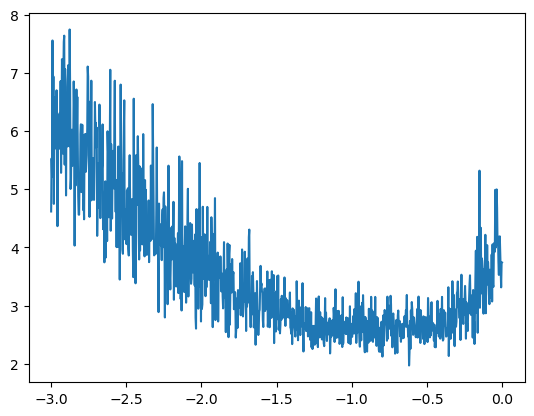

In [42]:
plt.plot(lri,lossi)

In [37]:
#learning rate decay: 
#first find the learning rate by following above 
#then start with the learning rate
#train with it for a while
#then apply reduce the learning rate by the factor of 10 also called the learning rate decay

In [43]:
#Next step would be to differentiate our data set into three stages. Because even after loss minimisation
# we will find that the ai will repeat what data is exactly in examples and no new data will be created.

#training split, dev/validation split, test split
#80%, 10%, 10%

#training split:
is used to optimize the parameters of the model, above steps using gradient descent


#dev/validation split:
used for development over hyperparameters(the hidden layer/ tanh) the strength of regularization

#test split:
used to evaluate the performance of the model at the end



SyntaxError: invalid syntax (2108294218.py, line 8)

In [ ]:
not complete check the note
